<a href="https://colab.research.google.com/github/kristianJW54/Jeopardy_quiz/blob/main/ML_Linear_Regression_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Basic Implementation

**Sample Data**

- Create sample x and y data for practice

In [57]:
#Sample data

months_t = np.array([3, 4, 6, 8, 10, 12, 14, 16, 20])
runtime = np.array([10.00, 9.45, 9.27, 9.18, 9.09, 8.56, 8.43, 8.38, 8.29])


**Basic Implementation of Linear Model**

- First initialise the slope and intercept (m, b)
- Then set a learning rate and find number of samples
- Create a loop for a number of epochs
-- Within the loop calculate the predicted values (y = mx + b)
-- Calculate the error using the MSE (Means Squared Error)
-- Perform the gradient calculations for m ➡  -2/n * sum(y - (mx + b))
-- Perform the gradient calculations for b ➡ -2/n * sum(x * (y - (mx + b)))
-- Finally update the parameters ➡ b - learning rate * gradient
- Create a prediction using learned parameters to plot line of best fit


Consider:
In order to fine tune and find the best line
- Updating the learning rate
- Updating the epoch





In [157]:
#y = mx + b

#My Estimate of Best line
m_me = -0.099
b_me = 9.99

yme = [m_me * x + b_me for x in months_t]
my_error = np.mean((runtime - yme) ** 2)

#Initializing parameters
m = 0
b = 0

# Lists to store the history of the cost function and parameters
cost_history = []
m_history = []
b_history = []

#Learning Rate
lr = 0.0073

#Number of samples
n = len(runtime)

#Gradient Descent
for epoch in range(2000):

  #Predicted values
  ypred = m * months_t + b

  #Error
  mse = np.mean((runtime - ypred) ** 2)

  #Gradient Calculations
  gradient_b = -2/n * np.sum(runtime - ypred)
  gradient_m = -2/n * np.sum(months_t * (runtime - ypred))

  # Update parameters
  b = b - lr * gradient_b
  m = m - lr * gradient_m

  cost_history.append(mse)
  m_history.append(m)
  b_history.append(b)
  # Print the progress every 100 epochs
  if epoch % 100 == 0:

    print(f"Epoch {epoch}, MSE: {mse}, m: {m}, b: {b}")
    time.sleep(1)

# Print final parameters
print(f"Final Error - MSE: {mse}")
print(f"My Error - MSE: {my_error}")

print(f"Final parameters - m: {m}, b: {b}")

y_pred = [m * x + b for x in months_t]



Epoch 0, MSE: 80.60254444444445, m: 1.311372, b: 0.1308322222222222
Epoch 100, MSE: 23.8520055526739, m: 0.7568284399210954, b: 2.732673436019257
Epoch 200, MSE: 8.737318513935213, m: 0.44720513709377335, b: 4.64921734036344
Epoch 300, MSE: 3.8518996198017867, m: 0.26466319024393103, b: 6.058903545045425
Epoch 400, MSE: 1.906677714971511, m: 0.15121266003501543, b: 7.094835894760627
Epoch 500, MSE: 1.0036798954408581, m: 0.07737203941878851, b: 7.855677450693446
Epoch 600, MSE: 0.5479034066178649, m: 0.027507242944641255, b: 8.414280648139295
Epoch 700, MSE: 0.3089160787815535, m: -0.007100417461969616, b: 8.824311588969218
Epoch 800, MSE: 0.18159380368206812, m: -0.03158485172663565, b: 9.12524461626646
Epoch 900, MSE: 0.11332743529208705, m: -0.04913321075362996, b: 9.346088600884698
Epoch 1000, MSE: 0.07663257397629397, m: -0.06181794195045443, b: 9.508149350472268
Epoch 1100, MSE: 0.056888614545924865, m: -0.07103756771276791, b: 9.627069499938179
Epoch 1200, MSE: 0.046261093721031

**Visualise the Gradient Descent**

- In order to monitor the gradient descent and convergence, consider storing each iteration in a list and

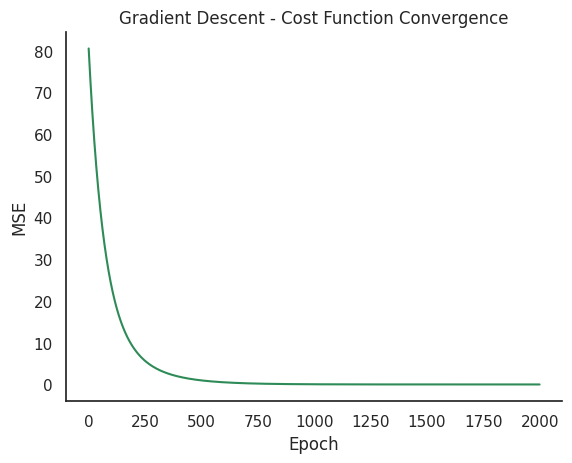

<Figure size 640x480 with 0 Axes>

In [135]:
#Plotting gradient descent

sns.set(style="white")
sns.light_palette("seagreen", as_cmap=True)

plt.plot(cost_history, linestyle="-", color="seagreen")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Gradient Descent - Cost Function Convergence")

sns.despine()
plt.show()
plt.clf()




**Plot the Linear Regression on the Sample Data**

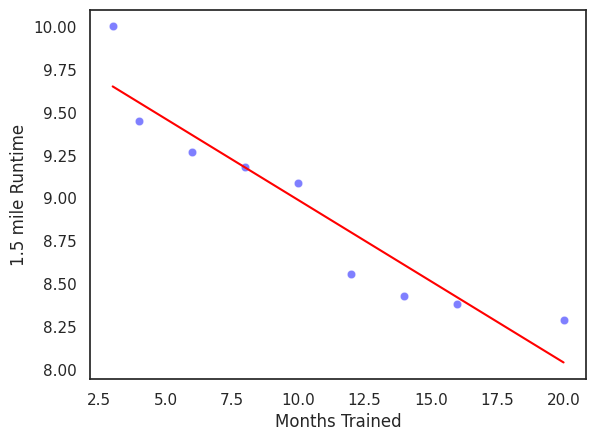

In [137]:
sns.scatterplot(x=months_t, y=runtime, color="blue", alpha=0.5)
plt.xlabel("Months Trained")
plt.ylabel("1.5 mile Runtime")

#linear line
plt.plot(months_t, ypred, color="red")
plt.show()

**Making Predictions**

- Using the trained parameters, create a function to predict new values given an input value

In [154]:
#Predictions

num_months = 30
run = 7.50

def predict_y(x, m, b):
  runtime_minutes =  m * x + b

  minutes = int(runtime_minutes)
  seconds = int((runtime_minutes - minutes) * 60)

  # Format as "mm:ss"
  formatted_runtime = f"{minutes:02}:{seconds:02}"

  return formatted_runtime

#What runtime would I achieve if i ran for n months?
print(f"Predicted Runtime for {num_months} Months")
print(f"{predict_y(num_months, m, b)}")
print("------------------------------------")

def predict_x(y, m, b):
  return (y - b) / m

#How many months would I need to run in order to achieve a runtime of n?
print(f"Predicted Number of Months to Achieve a Runtime of {run}")
print(f"{round(predict_x(run, m, b))} Months")

Predicted Runtime for 30 Months
07:05
------------------------------------
Predicted Number of Months to Achieve a Runtime of 7.5
26 Months


# Building Linear Regression Model Class


**Import Training Data**

- Importing training data
- Using explority analysis to determine possible relationships
- Determine parameters to train model on

In [164]:
path = "/content/sample_data/california_housing_train.csv"
path2 = "/content/sample_data/mnist_train_small.csv"

with open(path, "r") as file:
  data = pd.read_csv(file)


data.head(10)




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


**Sample The Data**

In [325]:
#Sample the data

sample = data.sample(n=500, random_state=55)
# sample["median_income"] = sample["median_income"].apply(lambda x: x * 10000)

sample.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15931,-122.43,37.77,52.0,1862.0,472.0,872.0,471.0,3.2981,222700.0
15340,-122.29,37.97,20.0,3426.0,632.0,1512.0,580.0,4.4911,227400.0
4402,-118.03,34.11,38.0,2076.0,361.0,988.0,332.0,5.9175,416900.0
8792,-118.63,34.20,19.0,7411.0,1045.0,2814.0,950.0,6.7785,336100.0
14028,-122.05,38.56,20.0,1005.0,168.0,457.0,157.0,5.6790,225000.0


**Determine Relationships to train model on**

- Exploring the relationship between median income and median house value
- I will also add a column for median house age into three groups to help with analysing the relationship

In [326]:
#Age range labels

#Define ranges
def categorize_age(age):
    if age < 30:
        return "new"
    elif age < 50:
        return "medium"
    else:
        return "old"

# Create a new column for age ranges
sample["age_range"] = sample["housing_median_age"].apply(categorize_age)

sample.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age_range
15931,-122.43,37.77,52.0,1862.0,472.0,872.0,471.0,3.2981,222700.0,old
15340,-122.29,37.97,20.0,3426.0,632.0,1512.0,580.0,4.4911,227400.0,new
4402,-118.03,34.11,38.0,2076.0,361.0,988.0,332.0,5.9175,416900.0,medium
8792,-118.63,34.20,19.0,7411.0,1045.0,2814.0,950.0,6.7785,336100.0,new
14028,-122.05,38.56,20.0,1005.0,168.0,457.0,157.0,5.6790,225000.0,new


**Visualising the relationship**

- Plotting the median income against the median house value from the three age groups

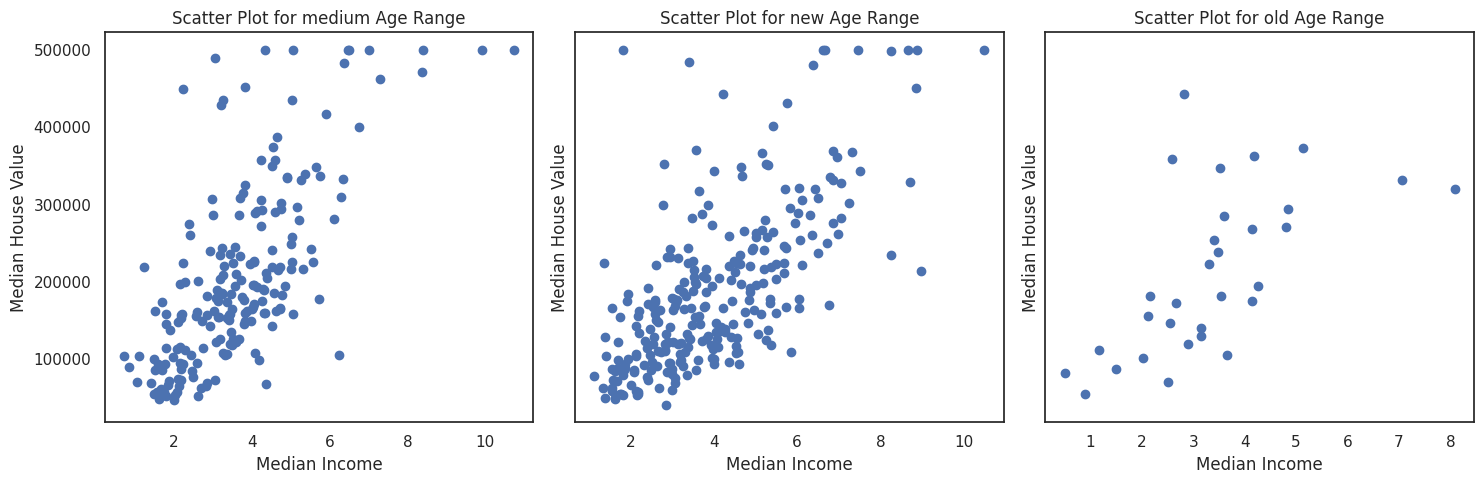

In [327]:
# Group by age range
grouped_data = sample.groupby("age_range")

# Plot separate scatter plots for each age range
fig, axs = plt.subplots(1, len(grouped_data), figsize=(15, 5), sharey=True)

for (age_range, group), ax in zip(grouped_data, axs):
    ax.scatter(x=group["median_income"], y=group["median_house_value"])
    ax.set_xlabel("Median Income")
    ax.set_ylabel("Median House Value")
    ax.set_title(f"Scatter Plot for {age_range} Age Range")

plt.tight_layout()
plt.show()

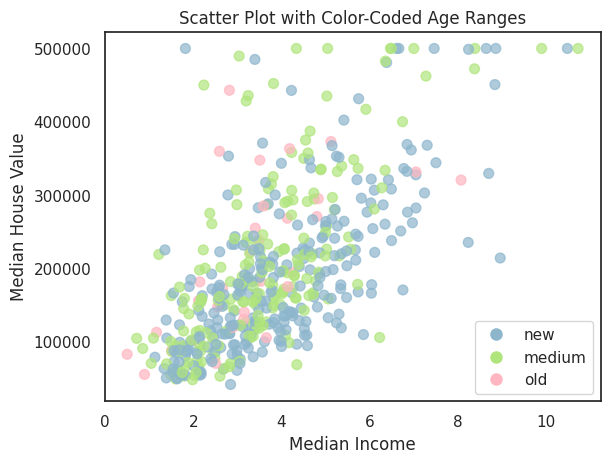

In [328]:
# Define pastel and soft colors for each age range
colors = {'new': '#8DB6CD', 'medium': '#B0E57C', 'old': '#FFB6C1'}

# Scatter plot with pastel colors, adjusted size, and alpha
plt.scatter(
    x=sample["median_income"],
    y=sample["median_house_value"],
    c=sample["age_range"].map(colors),
    s=50,  # Adjust marker size
    alpha=0.7  # Adjust transparency
)

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Scatter Plot with Color-Coded Age Ranges")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=age_range) for age_range, color in colors.items()])
plt.show()

**Building the regression model**

In [333]:
medium = sample[sample["age_range"] == "medium"]

m = 100
b = 1000

# Calculate predicted values
y = m * medium["median_income"] + b

# Calculate Mean Squared Error
my_error = np.mean((medium["median_house_value"] - y) ** 2)

print(my_error)


55090618253.64796


In [397]:

class LinearModel:
  def __init__(self):
      self.b_coef = 0
      self.m_coef = 0
      self.x_train = None
      self.y_train = None
      self.mse = []
      self.ypred_train = []

  def fit(self, x, y):
      try:
          if len(x) != len(y):
              raise ValueError("Input arrays x and y must have the same length.")
          self.x_train = x
          self.y_train = y
      except ValueError as e:
          print(f"Error: {e}")

  def calculate_mse(self, y_true, y_pred):
      return np.mean((y_true - y_pred) ** 2)

  def train(self, learning_rate=0.01, epochs=1000):
    if self.x_train is None or self.y_train is None:
        raise ValueError("Training Data Not Provided")

    self.b_coef = 0
    self.m_coef = 0
    self.ypred_train = []

    print("Training Model:")
    print("==================================================")

    # Gradient Descent
    for epoch in range(epochs):
      y_pred = self.m_coef * self.x_train + self.b_coef

      b_gradient = -2 / len(self.x_train) * np.sum(self.y_train - y_pred)
      m_gradient = -2 / len(self.x_train) * np.sum(self.x_train * (self.y_train - y_pred))

      # Check for NaN or Inf values in the gradients
      if np.isnan(b_gradient) or np.isinf(b_gradient) or np.isnan(m_gradient) or np.isinf(m_gradient):
        print(f"Warning: NaN or Inf values encountered at epoch {epoch}. Aborting training.")
        break

      self.b_coef -= learning_rate * b_gradient
      self.m_coef -= learning_rate * m_gradient

      self.ypred_train.append(y_pred)  # Store predicted values during training

      # Calculate MSE for monitoring
      mse = self.calculate_mse(self.y_train, y_pred)
      self.mse.append(mse)
      if epoch % 100 == 0:
          print(f"Epoch: {epoch} | MSE: {mse} | M: {self.m_coef} | B: {self.b_coef}")
          # time.sleep(1)

    print("Training Complete")
    print("==================================================")
    print(f"MSE : {mse} | M Coefficient : {self.m_coef} | B Coefficient {self.b_coef}")

  def print_coef(self):
      print(f"B Coefficient (y-intercept) | {self.b_coef}")
      print(f"M Coefficient (slope) | {self.m_coef}")

  def predict(self, x):
        if self.x_train is not None and self.y_train is not None and self.b_coef is not None and self.m_coef is not None:
            return self.m_coef * x + self.b_coef
        else:
            raise ValueError("Model not trained or data not provided")

  def show_gradient_descent(self):
    sns.set(style="white")
    sns.light_palette("seagreen", as_cmap=True)

    plt.plot(self.mse, linestyle="-", color="seagreen")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.title("Gradient Descent - Convergence")

    sns.despine()
    plt.show()




**Training the Model**

- First seperate the age groups into different dataframes
- Fit the data to the model
- Call the train method
- Tune the parameters to find the best fit

In [395]:

medium = sample[sample["age_range"] == "medium"]

model = LinearModel()
model.fit(x=medium["median_income"], y=medium["median_house_value"])

model.train(learning_rate=0.0001, epochs=3000)

ypred = model.predict(medium["median_income"])


Training Model:
Epoch: 0 | MSE: 55674707673.30198 | M: 174.72233879207923 | B: 41.12505643564357
Epoch: 100 | MSE: 32060856544.365505 | M: 15027.907132471366 | B: 3539.3352546465862
Epoch: 200 | MSE: 19868732758.323498 | M: 25699.741321888265 | B: 6056.805466123465
Epoch: 300 | MSE: 13573783682.443178 | M: 33367.074860695684 | B: 7869.555114112737
Epoch: 400 | MSE: 10323616610.63831 | M: 38875.5315367667 | B: 9175.917580686011
Epoch: 500 | MSE: 8645507018.139133 | M: 42832.73306588674 | B: 10118.405057694063
Epoch: 600 | MSE: 7779069589.950825 | M: 45675.28512655887 | B: 10799.419503119792
Epoch: 700 | MSE: 7331708278.567418 | M: 47716.91007635646 | B: 11292.541725556717
Epoch: 800 | MSE: 7100721041.227344 | M: 49183.03264415353 | B: 11650.643139184169
Epoch: 900 | MSE: 6981450384.659042 | M: 50235.631428184286 | B: 11911.714453321767
Epoch: 1000 | MSE: 6919860391.020947 | M: 50991.095903261375 | B: 12103.053868698536
Epoch: 1100 | MSE: 6888051668.289932 | M: 51533.057546932854 | B: 12

**Monitoring Gradient Descent to find convergence**

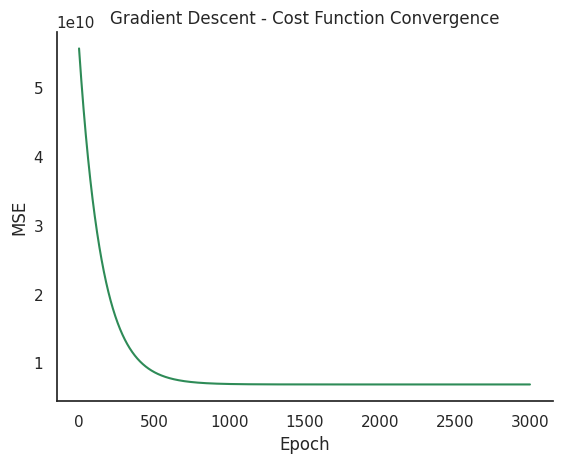

In [396]:
model.show_gradient_descent()

**Plotting Results on Scatter Plot**

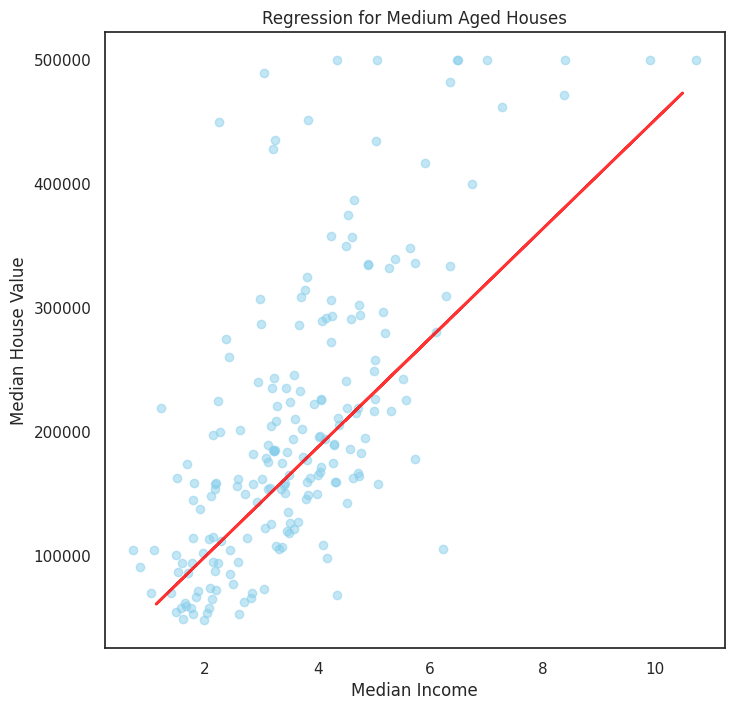

In [416]:
#Plotting results

plt.figure(figsize=(8,8))
plt.scatter(x=medium["median_income"], y=medium["median_house_value"], alpha = 0.5, color = "skyblue")
plt.title("Regression for Medium Aged Houses")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.plot(model.x_train, ypred, color="red", alpha = 0.8, linewidth = 2)
plt.show()

**Testing on new data**

- Using the data from the other two age groups
- Train the model and fit a line of best fit to a plot
- Check the models ability to learn on new data

In [413]:
#New Age Houses

new = sample[sample["age_range"] == "new"]

model2 = LinearModel()
model2.fit(x=new["median_income"], y=new["median_house_value"])

model2.train(learning_rate=0.0001, epochs=3000)

ypred = model2.predict(new["median_income"])

Training Model:
Epoch: 0 | MSE: 46661139775.30711 | M: 175.70542242441948 | B: 37.841952808988765
Epoch: 100 | MSE: 24314972440.04676 | M: 14649.705603768749 | B: 3163.9560252715514
Epoch: 200 | MSE: 14205871970.140259 | M: 24381.48018410348 | B: 5282.2117124329125
Epoch: 300 | MSE: 9632581776.099989 | M: 30923.68033106177 | B: 6722.542238064884
Epoch: 400 | MSE: 7563584565.500602 | M: 35320.60725784429 | B: 7706.85829627928
Epoch: 500 | MSE: 6627481259.824235 | M: 38274.64990492594 | B: 8384.415457429479
Epoch: 600 | MSE: 6203877759.68365 | M: 40258.22964574251 | B: 8855.602013532176
Epoch: 700 | MSE: 6012119915.521754 | M: 41589.0934354699 | B: 9187.938500296
Epoch: 800 | MSE: 5925245279.87356 | M: 42480.95540428532 | B: 9426.83885268733
Epoch: 900 | MSE: 5885818522.438357 | M: 43077.55800382728 | B: 9602.848275468496
Epoch: 1000 | MSE: 5867857019.585577 | M: 43475.58127255342 | B: 9736.511379301985
Epoch: 1100 | MSE: 5859606736.446658 | M: 43740.05143156841 | B: 9841.646451685117
Ep

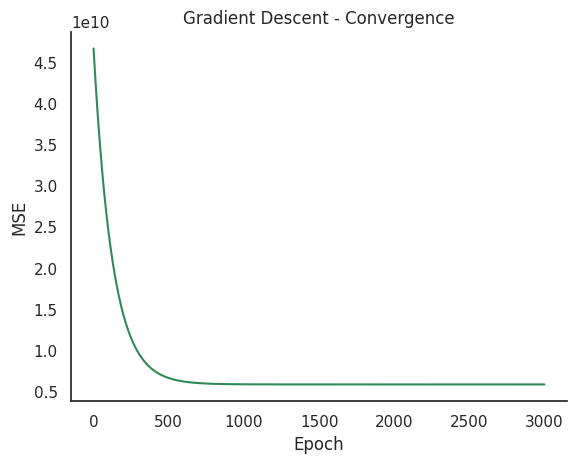

In [414]:
model2.show_gradient_descent()

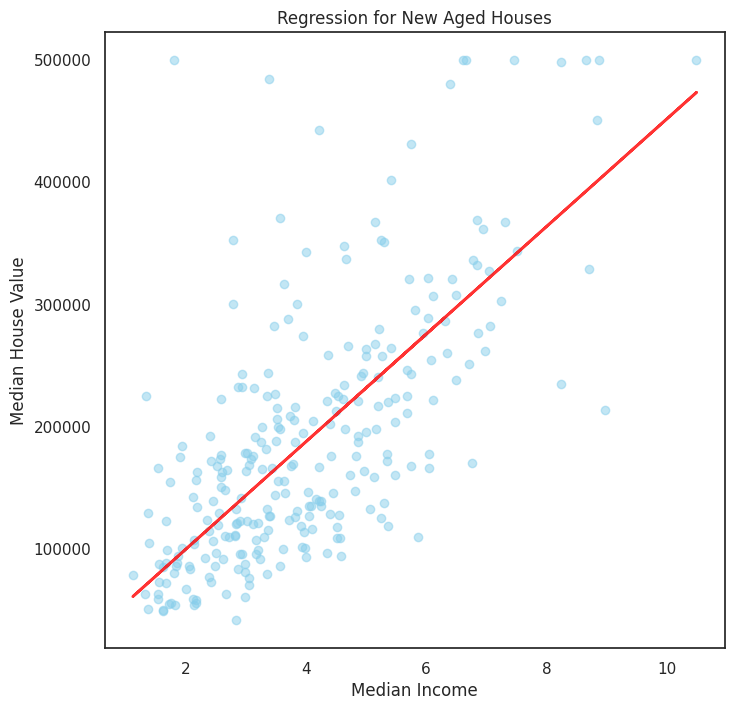

In [417]:
#Plotting results

plt.figure(figsize=(8,8))
plt.scatter(x=new["median_income"], y=new["median_house_value"], alpha = 0.5, color = "skyblue")
plt.title("Regression for New Aged Houses")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.plot(model2.x_train, ypred, color="red", alpha = 0.8, linewidth = 2)
plt.show()